<h1 align="center"> Homework 5 Programming Task</h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python, 2022 Fall </h3>
<h3 align="center"> Student: Ronald Adomako </h3>

**Instruction:**

Complete the following tasks (2 points for each task, 14 points in total). You can add additional lines if necessary.

# Task: Dataset Manipulation (14 points)

(1) Read in dataset

The file 'FleetData.csv' contains a dataset of airlines around the world and the airplanes that each owns and operates.

Dataset includes the following information:

- Parent Airline: i.e. International Airlines Group (IAG)
- Airline: i.e. Iberia, Aer Lingus, British Airways...etc. which are owned by IAG
- Aircraft Type: Manufacturer & Model
- Current: Quantity of airplanes in Operation
- Future: Quantity of airplanes on order, from planespotter.net
- Order: Quantity airplanes on order, from Wikipedia
- Unit Cost: Average unit cost (\$M) of Aircraft Type, as found by Wikipedia and various google searches
- Total Cost: Current quantity * Unit Cost (\$M)
- Average Age: Average age of "Current" airplanes by "Aircraft Type"

After import data, show its head.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("FleetData.csv")
df.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3


(2) Remove special characters [spaces,'(', and ')'] from column names

For example, column 'Parent Airline' will be renamed as 'ParentAirline', and column 'Total Cost (Current)' will be renamed as 'TotalCostCurrent'.

Hint: Use regular expressions. You can import re first, then use re.sub() method to replace strings in the columns.

In [3]:
df.columns.str.replace(" ", "")

Index(['ParentAirline', 'Airline', 'AircraftType', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'UnitCost', 'TotalCost(Current)',
       'AverageAge'],
      dtype='object')

In [4]:
type(df.columns)

pandas.core.indexes.base.Index

In [6]:
exp = [" ", "(", ")"]

for char in exp:
    df.columns = df.columns.str.replace(char, "")


/opt/anaconda3/envs/MyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Show the head again to verify the change of column names.

In [7]:
df.head()

,ParentAirline,Airline,AircraftType,Current,Future,Historic,Total,Orders,UnitCost,TotalCostCurrent,AverageAge
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3


(3) Remove non-digital symbols such as "$" and "," from all values in columns "UnitCost" and "TotalCostCurrent". Convert these two columns' datatype as float.

In [8]:
df["UnitCost"] = df["UnitCost"].str.replace("$","")
df["UnitCost"] = df["UnitCost"].str.replace(",","")

/opt/anaconda3/envs/MyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [9]:
df["TotalCostCurrent"] = df["TotalCostCurrent"].str.replace("$","")
df["TotalCostCurrent"] = df["TotalCostCurrent"].str.replace(",","")

/opt/anaconda3/envs/MyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [10]:
'Casting select fields as float'

df["UnitCost"] = df["UnitCost"].astype(float)
df["TotalCostCurrent"] = df["TotalCostCurrent"].astype(float)

Show the dataset information to verify the change of the datatype of these two columns.

In [11]:
df.head()

,ParentAirline,Airline,AircraftType,Current,Future,Historic,Total,Orders,UnitCost,TotalCostCurrent,AverageAge
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,90.0,0.0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,98.0,0.0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,115.0,919.0,10.3


(4) Calculate the number of unique Airline companies in the dataset.

In [12]:
len(df['Airline'].unique())

280

In [14]:
'Now adjust for NaN'
len(df['Airline'].dropna().unique())

280

(5) Calculate the number of unique Parent Airline companies.

In [13]:
len(df['ParentAirline'].unique())

117

In [15]:
'Now adjust for NaN'
len(df['ParentAirline'].dropna().unique())

117

(6) Calculate the number of airplanes in operation for each parent airline. 

First, create a new dataset that only contains the 'ParentAirline' and 'Current' columns. 

Then drop all observations that have NAs in the 'ParentAirline' and 'Current' columns.

Then group the new dataset by 'ParentAirline' and calculate the sum of 'Current' value for each parent airline company. Sort the summarized dataset by the number of airplanes in operation in descending order. 

Hint: Check how many rows are in the grouped dataset, if the number of rows does not match the result in step 4, your grouped dataset is not correct.

In [21]:
#df.dropna?

In [25]:
df_ParentAirline = df[['ParentAirline','Current']]
#df_ParentAirline.dropna(inplace=True)
df_ParentAirline = df_ParentAirline.dropna()
df_ParentAirline.head()

,ParentAirline,Current
0,Aegean Airlines,1.0
2,Aegean Airlines,38.0
4,Aegean Airlines,8.0
5,Aegean Airlines,2.0
9,Aegean Airlines,12.0


In [26]:
df_ParentAirline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 0 to 1582
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ParentAirline  859 non-null    object 
 1   Current        859 non-null    float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


In [40]:
df_ParentAirline.groupby?

In [48]:
#df_ParentAirline_sum = df_ParentAirline.groupby('ParentAirline').sum()

aux = df_ParentAirline['ParentAirline'].str.lower()
df_ParentAirline_sum = df_ParentAirline.groupby(aux).sum()

pd.set_option('display.max_rows',1000)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also


print(df_ParentAirline_sum)

                                 Current
ParentAirline                           
aegean airlines                     61.0
aeroflot                           282.0
aerolineas argentinas               80.0
air algerie                         56.0
air arabia                          46.0
air astana                          31.0
air berlin                         130.0
air canada                         214.0
air china                          708.0
air europa                          51.0
air france/klm                     541.0
air india                          146.0
air malta                            9.0
air mauritius                       13.0
air namibia                         10.0
air new zealand                    105.0
air transat                         41.0
air transport international         17.0
air transport services              28.0
air wisconsin                       66.0
airasia                            204.0
alaska airlines                    225.0
alitalia        

#### Check meets 117 rows. Okay.

In [49]:
'''Row Check'''
df_ParentAirline_sum.info()


<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, aegean airlines to wizz air
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Current  117 non-null    float64
dtypes: float64(1)
memory usage: 1.8+ KB


(7) Visualize the top 10 parent airlines with its number of airplanes in operation.

Select the top 10 parent airlines that have the most number of airplanes in operation. Visualize their number of airplanes in operation in a bar chart.

**Hint**: 
- Before you call the plot() method, select the 'Current' column, such that you can plot a series object rather than a DataFrame with multiple columns.
- You can set the pamater kind = 'bar' in the plot() method to draw a bar chart. 


In [52]:
#maxDF = df_ParentAirline.sort_values?

In [56]:
maxDF = df_ParentAirline_sum.sort_values('Current',ascending=False)
maxDF

,Current
ParentAirline,
american airlines,1410.0
delta airlines,989.0
lufthansa,737.0
united airlines,730.0
southwest airlines,718.0
air china,708.0
fedex express,696.0
iag,608.0
china eastern airlines,579.0


In [62]:
#print(maxDF.iloc[:10])
#print(maxDF['Current'])
maxDF_Series = pd.Series(maxDF['Current'].iloc[:10])
maxDF_Series

ParentAirline
american airlines         1410.0
delta airlines             989.0
lufthansa                  737.0
united airlines            730.0
southwest airlines         718.0
air china                  708.0
fedex express              696.0
iag                        608.0
china eastern airlines     579.0
air france/klm             541.0
Name: Current, dtype: float64

In [70]:
maxDF.index

Index(['american airlines', 'delta airlines', 'lufthansa', 'united airlines',
       'southwest airlines', 'air china', 'fedex express', 'iag',
       'china eastern airlines', 'air france/klm',
       ...
       'air astana', 'royal jordanian', 'gulf air', 'air transport services',
       'skymark airlines', 'meridiana', 'air transport international',
       'air mauritius', 'air namibia', 'air malta'],
      dtype='object', name='ParentAirline', length=117)

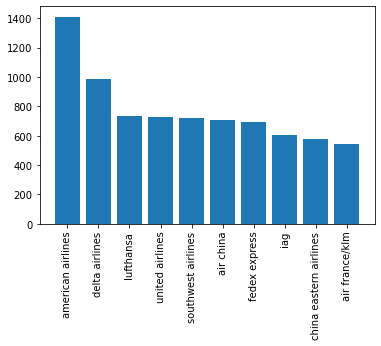

In [95]:
maxInd = maxDF.index[:10]

plt.bar(maxInd,maxDF_Series)
plt.xticks(rotation=90);